In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [5]:
print(x_train[0])
print(y_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [10]:
hidden_activation = 'relu'
output_activation = 'softmax'

learning_rate = 0.001

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                             tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
                             tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
                             tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(500, activation= hidden_activation),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(100, activation= hidden_activation),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10, activation= output_activation)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer= optimizer, loss= loss, metrics= ['accuracy'])

In [11]:
epochs = 50
batch_size = 100

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2, validation_data= (x_test, y_test))

Epoch 1/50
500/500 - 11s - loss: 1.9596 - accuracy: 0.2536 - val_loss: 1.4849 - val_accuracy: 0.4593 - 11s/epoch - 21ms/step
Epoch 2/50
500/500 - 10s - loss: 1.4191 - accuracy: 0.4856 - val_loss: 1.1784 - val_accuracy: 0.5771 - 10s/epoch - 19ms/step
Epoch 3/50
500/500 - 10s - loss: 1.2063 - accuracy: 0.5757 - val_loss: 1.0212 - val_accuracy: 0.6388 - 10s/epoch - 20ms/step
Epoch 4/50
500/500 - 10s - loss: 1.0729 - accuracy: 0.6280 - val_loss: 0.9241 - val_accuracy: 0.6811 - 10s/epoch - 20ms/step
Epoch 5/50
500/500 - 10s - loss: 0.9721 - accuracy: 0.6670 - val_loss: 0.8336 - val_accuracy: 0.7093 - 10s/epoch - 20ms/step
Epoch 6/50
500/500 - 10s - loss: 0.9158 - accuracy: 0.6888 - val_loss: 0.7892 - val_accuracy: 0.7301 - 10s/epoch - 21ms/step
Epoch 7/50
500/500 - 10s - loss: 0.8559 - accuracy: 0.7094 - val_loss: 0.7469 - val_accuracy: 0.7465 - 10s/epoch - 20ms/step
Epoch 8/50
500/500 - 10s - loss: 0.8049 - accuracy: 0.7267 - val_loss: 0.7059 - val_accuracy: 0.7565 - 10s/epoch - 20ms/step


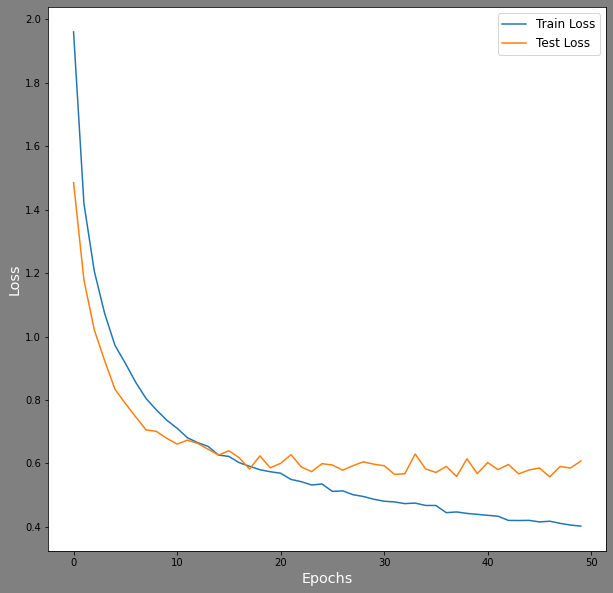

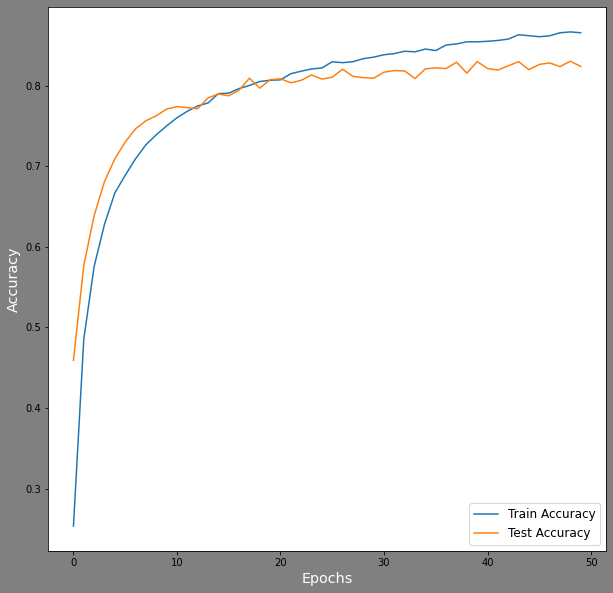

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

t = np.arange(0, epochs, 1.)

plt.figure(1, figsize=(10,10), facecolor='grey')

plt.plot(t, train_loss, t, val_loss)
plt.xlabel('Epochs', fontsize='x-large', color='white')
plt.ylabel('Loss', fontsize='x-large', color='white')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right', fontsize='large')

plt.figure(2, figsize=(10,10), facecolor='grey')

plt.plot(t, train_accuracy, t, val_accuracy)
plt.xlabel('Epochs', fontsize='x-large', color='white')
plt.ylabel('Accuracy', fontsize='x-large', color='white')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right', fontsize='large')

plt.show()